<a href="https://colab.research.google.com/github/stepanmouratoglou-a11y/K-Means-Clustering/blob/main/Clustering%20Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the Dataset

In [22]:
dataset=pd.read_csv('CC_GENERAL.csv')
dataset=dataset.drop(columns=['CUST_ID'])
X=dataset.iloc[:,:].values

# Checking for missing Values

In [23]:
column_X=dataset.columns
column_index=[]

for cols in column_X:
  missing_values=dataset[cols].isnull().sum()
  if missing_values>0:
    column_index.append({'column ':cols,
                         'index':dataset.columns.get_loc(cols)})

col_ind_len=len(column_index)

for i in range(0,col_ind_len):
  print(column_index[i])


{'column ': 'CREDIT_LIMIT', 'index': 12}
{'column ': 'MINIMUM_PAYMENTS', 'index': 14}


# Handling missing data

In [24]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
X[:,[12]]=imputer.fit_transform(X[:,[12]])
X[:,[14]]=imputer.fit_transform(X[:,[14]])

# Applying Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [26]:
print(X)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


# Applying the Elbow method with K Means++ to see the ideal number of clusters

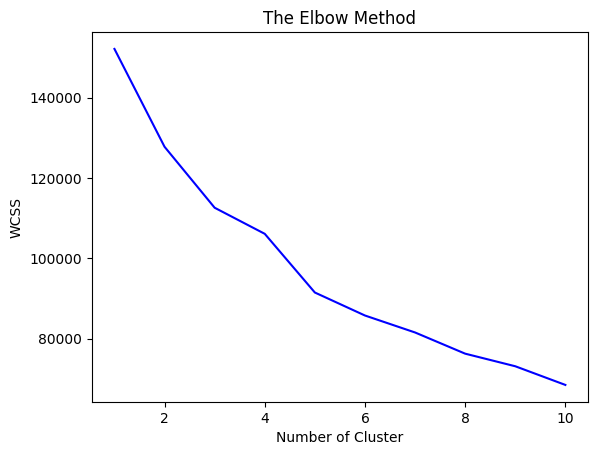

In [27]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color='blue')
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

# Training & prediction

In [28]:
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(X)

In [29]:
dataset['Cluster']=y_kmeans
print(dataset.groupby('Cluster').mean())

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        1524.610238           0.965721   255.629606        206.571304   
1        3588.990384           0.986874  7815.732886       5203.519089   
2         930.357741           0.962886  1299.705338        633.167216   
3         111.260364           0.381755   335.222822        199.440295   
4        4901.241786           0.967162   551.983377        347.758605   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     49.407619    792.368773             0.159106   
1                   2613.732785    661.788641             0.944730   
2                    666.735496    226.754889             0.897121   
3                    136.001245    325.747598             0.281932   
4                    204.327573   4982.037485             0.3

# Visualising our result

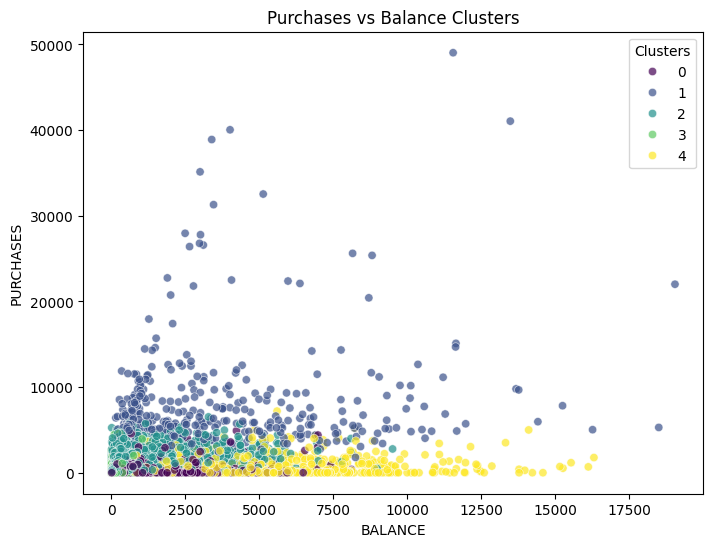

In [30]:
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=dataset,
    x='BALANCE',
    y='PURCHASES',
    hue='Cluster',
    palette='viridis',
    alpha=0.7
)

plt.title("Purchases vs Balance Clusters")
plt.legend(title='Clusters')
plt.show()